<a href="https://colab.research.google.com/github/bhattrahul301/Assignment1/blob/main/Assignment_1_Nearest_Neighbours_%26_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib as plt
%matplotlib inline

In [22]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)

In [23]:
#1. Use pandas to get some insights into the data

df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [24]:
df.reset_index(drop = True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [25]:
df.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [26]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [27]:
df.size

4515

In [28]:
df.shape

(645, 7)

In [36]:
df.rename(columns = {"Living.Room" : "LivingRoom"})

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [37]:
df[df["Sqft"] >= 300.000]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [39]:
df.isnull().count()


Sqft           645
Floor          645
TotalFloor     645
Bedroom        645
Living.Room    645
Bathroom       645
Price          645
dtype: int64

In [40]:
df["Sqft"].value_counts()

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
            ..
1106.538     1
882.384      1
665.346      1
1209.720     1
1376.946     1
Name: Sqft, Length: 288, dtype: int64

In [41]:
df["Bathroom"].value_counts()

2    386
1    198
3     46
4     10
5      4
0      1
Name: Bathroom, dtype: int64

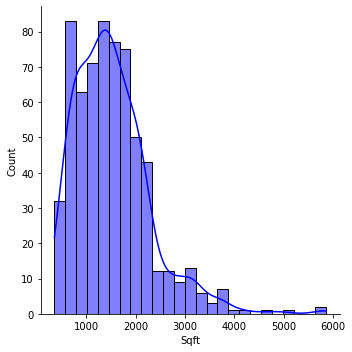

In [43]:
#2. Show some interesting visualization of the data

sns.displot(df['Sqft'],kde = True,color = "b" )

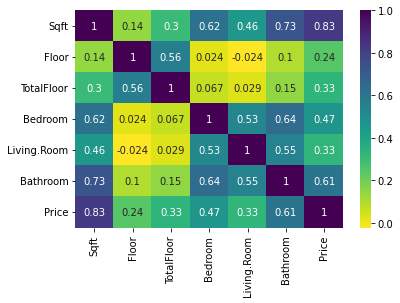

In [44]:
sns.heatmap(df.corr(), annot = True,cmap=plt.cm.get_cmap('viridis_r'))


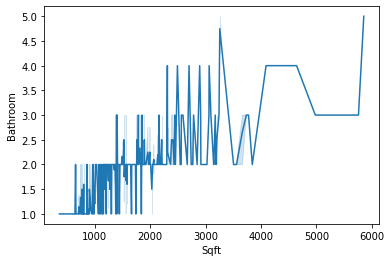

In [45]:
sns.lineplot(x = df["Sqft"], y = df["Bathroom"])


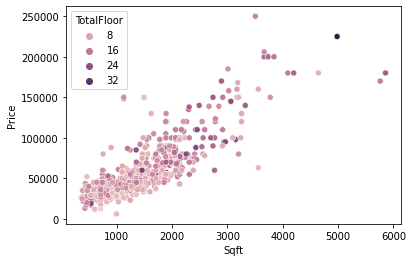

In [46]:
sns.scatterplot(data=df,x = df['Sqft'],y = df["Price"],hue = "TotalFloor")


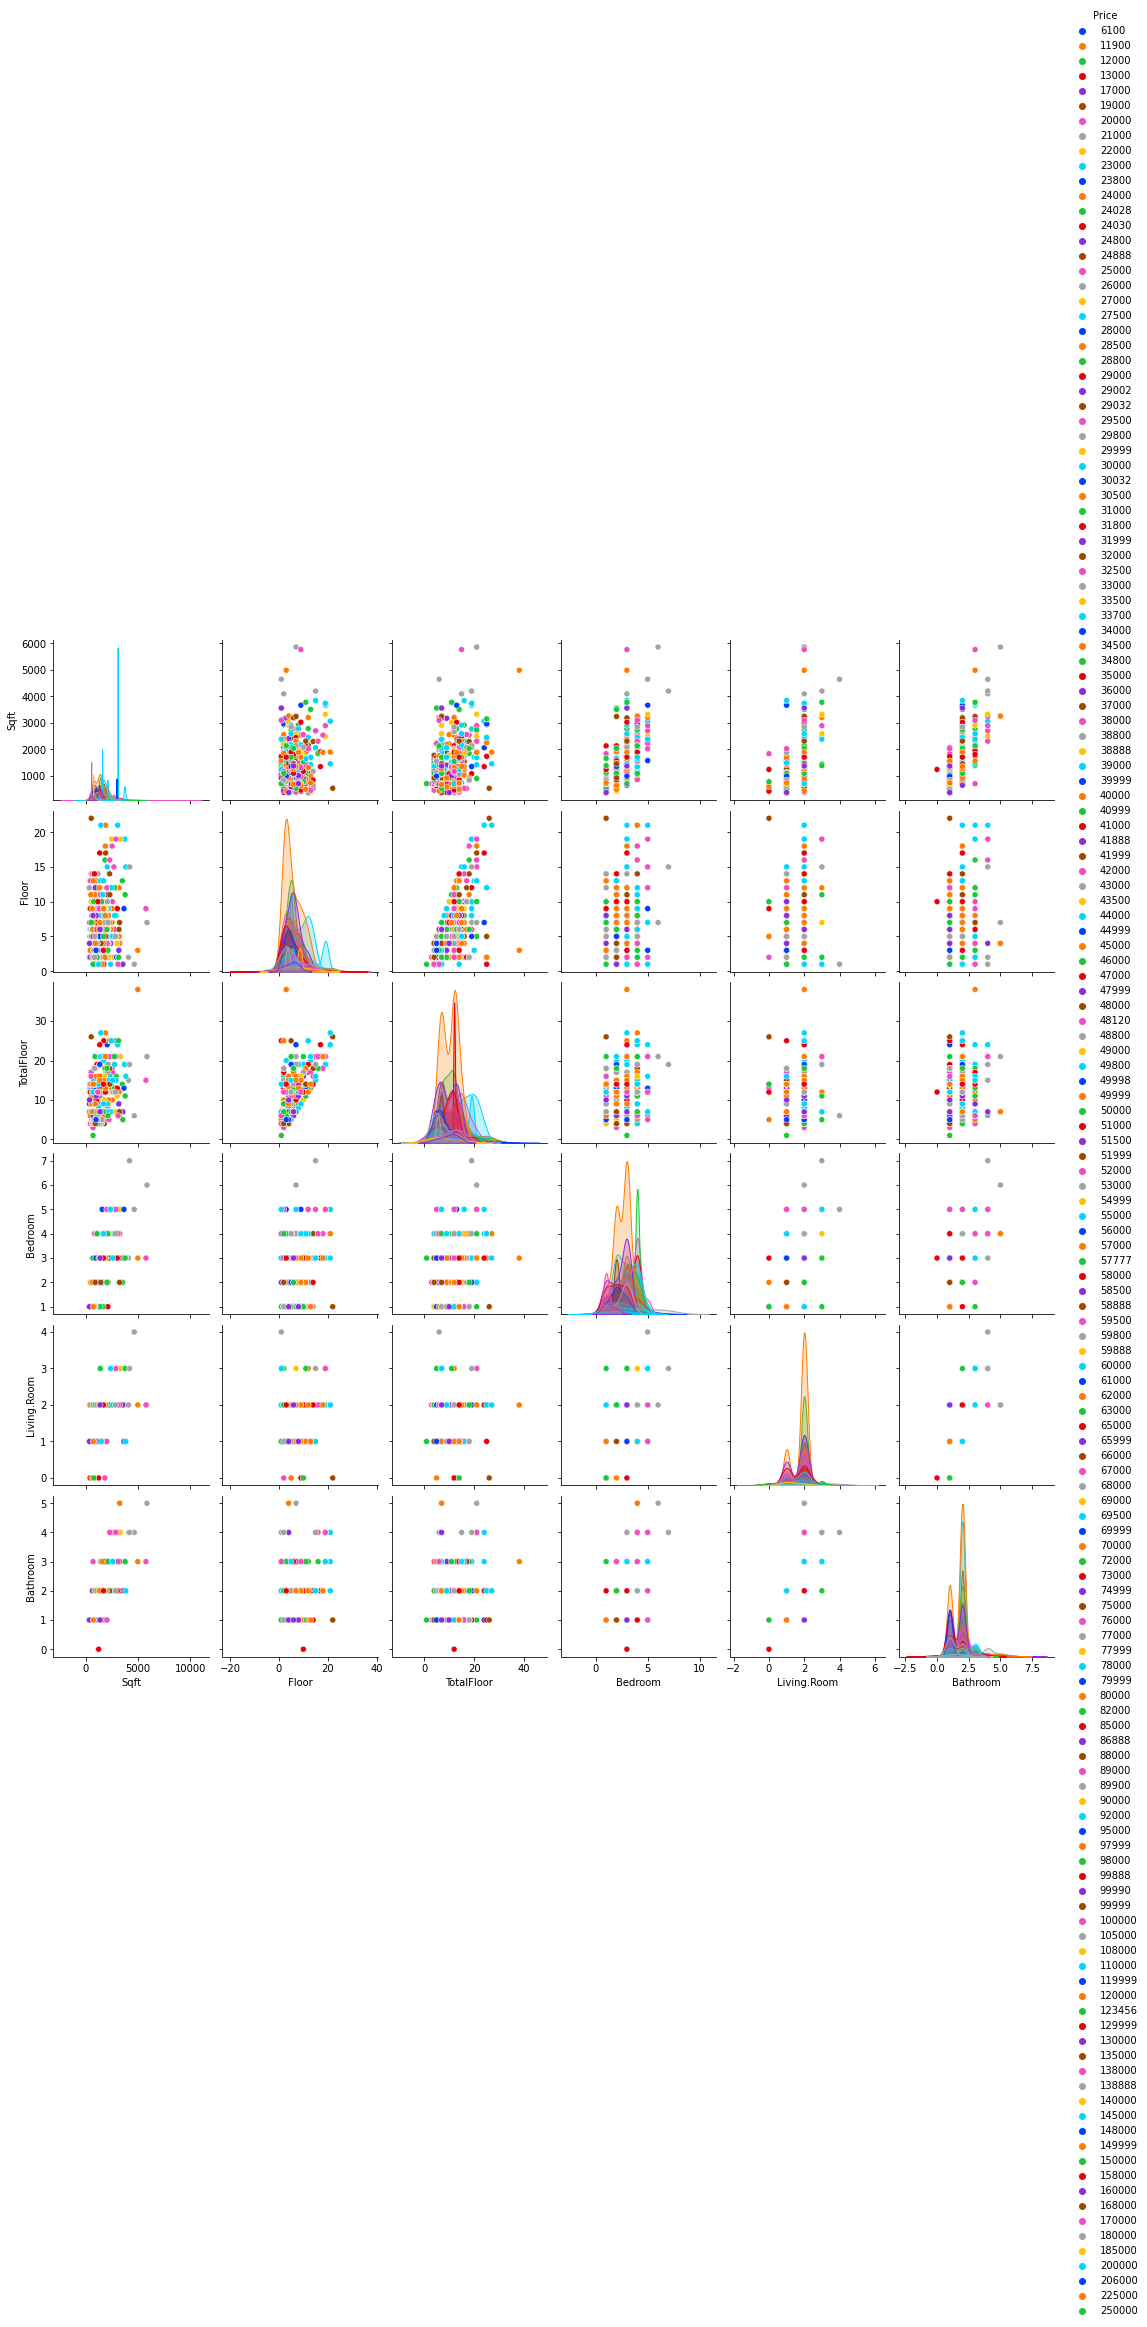

In [50]:
sns.pairplot(data = df,hue = "Price",palette = 'bright')


In [51]:
#3. Manage data for training & testing

from scipy import stats
x = np.abs(stats.zscore(df))
print(x)

[[4.56393027e-01 1.01489712e+00 7.72346989e-01 ... 4.02693633e-01
  2.76918224e-01 3.70055758e-04]
 [7.91797767e-01 2.42041579e-01 7.72346989e-01 ... 4.02693633e-01
  2.76918224e-01 4.49714146e-01]
 [5.07434286e-01 2.42041579e-01 7.72346989e-01 ... 4.02693633e-01
  1.18711665e+00 1.11965967e-01]
 ...
 [1.02712711e+00 1.81890652e+00 6.29802853e-01 ... 1.76178464e+00
  1.18711665e+00 4.77058040e-01]
 [2.34984030e-01 7.57278604e-01 6.29802853e-01 ... 4.02693633e-01
  2.76918224e-01 8.46220726e-02]
 [1.96546616e-01 1.55769333e-02 7.72346989e-01 ... 4.02693633e-01
  1.18711665e+00 7.29814091e-01]]


In [52]:
X = df.drop(labels = ['Price'] , axis = 1)
y = df['Price']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [55]:
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [56]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [57]:
#4. Finding a better value of k (10)

rmse = []
for k in range(1,21):
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(error)
    
    print('RMSE for k =',k,'is',error)

RMSE for k = 1 is 28740.98687543007
RMSE for k = 2 is 25809.822886193284
RMSE for k = 3 is 24291.663050620016
RMSE for k = 4 is 24977.058226068006
RMSE for k = 5 is 25323.77455646505
RMSE for k = 6 is 25085.194705872316
RMSE for k = 7 is 24668.375974162907
RMSE for k = 8 is 24335.135149370548
RMSE for k = 9 is 24425.13541554792
RMSE for k = 10 is 24635.197413173828
RMSE for k = 11 is 24853.12551297446
RMSE for k = 12 is 25206.739727198787
RMSE for k = 13 is 24897.83721710473
RMSE for k = 14 is 24810.124166081292
RMSE for k = 15 is 24790.18745828789
RMSE for k = 16 is 24881.24280137721
RMSE for k = 17 is 24942.733829931563
RMSE for k = 18 is 25052.316428727987
RMSE for k = 19 is 25307.533621720548
RMSE for k = 20 is 25365.975127803023


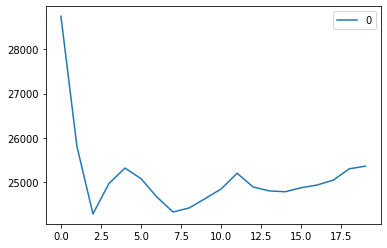

In [58]:
curve = pd.DataFrame(rmse)
curve.plot()